# Risk Diversification

In [18]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [19]:
port = pd.DataFrame()
tickers = ['ITMG.jk','APIC.jk', 'HEXA.jk', 'MFIN.jk','ARNA.jk'] 
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-04-30')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Creating Monthly Data & Return

In [20]:
monthly_port = port.resample('BM').last()
monthly_port.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-04-30,19225.0,590.0,3100.0,995.0,510.0
2019-05-31,17525.0,520.0,3050.0,1000.0,505.0
2019-06-28,17550.0,575.0,3060.0,1070.0,500.0
2019-07-31,16825.0,660.0,3360.0,1145.0,565.0
2019-08-30,13000.0,695.0,3210.0,1145.0,560.0


In [21]:
monthly_return = monthly_port.pct_change().dropna()
monthly_return.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-05-31,-0.088427,-0.118644,-0.016129,0.005025,-0.009804
2019-06-28,0.001427,0.105769,0.003279,0.070000,-0.009901
2019-07-31,-0.041311,0.147826,0.098039,0.070093,0.130000
2019-08-30,-0.227340,0.053030,-0.044643,0.000000,-0.008850
2019-09-30,-0.046154,0.079137,0.074766,0.008734,-0.089286


## Monthly Return & Correlation

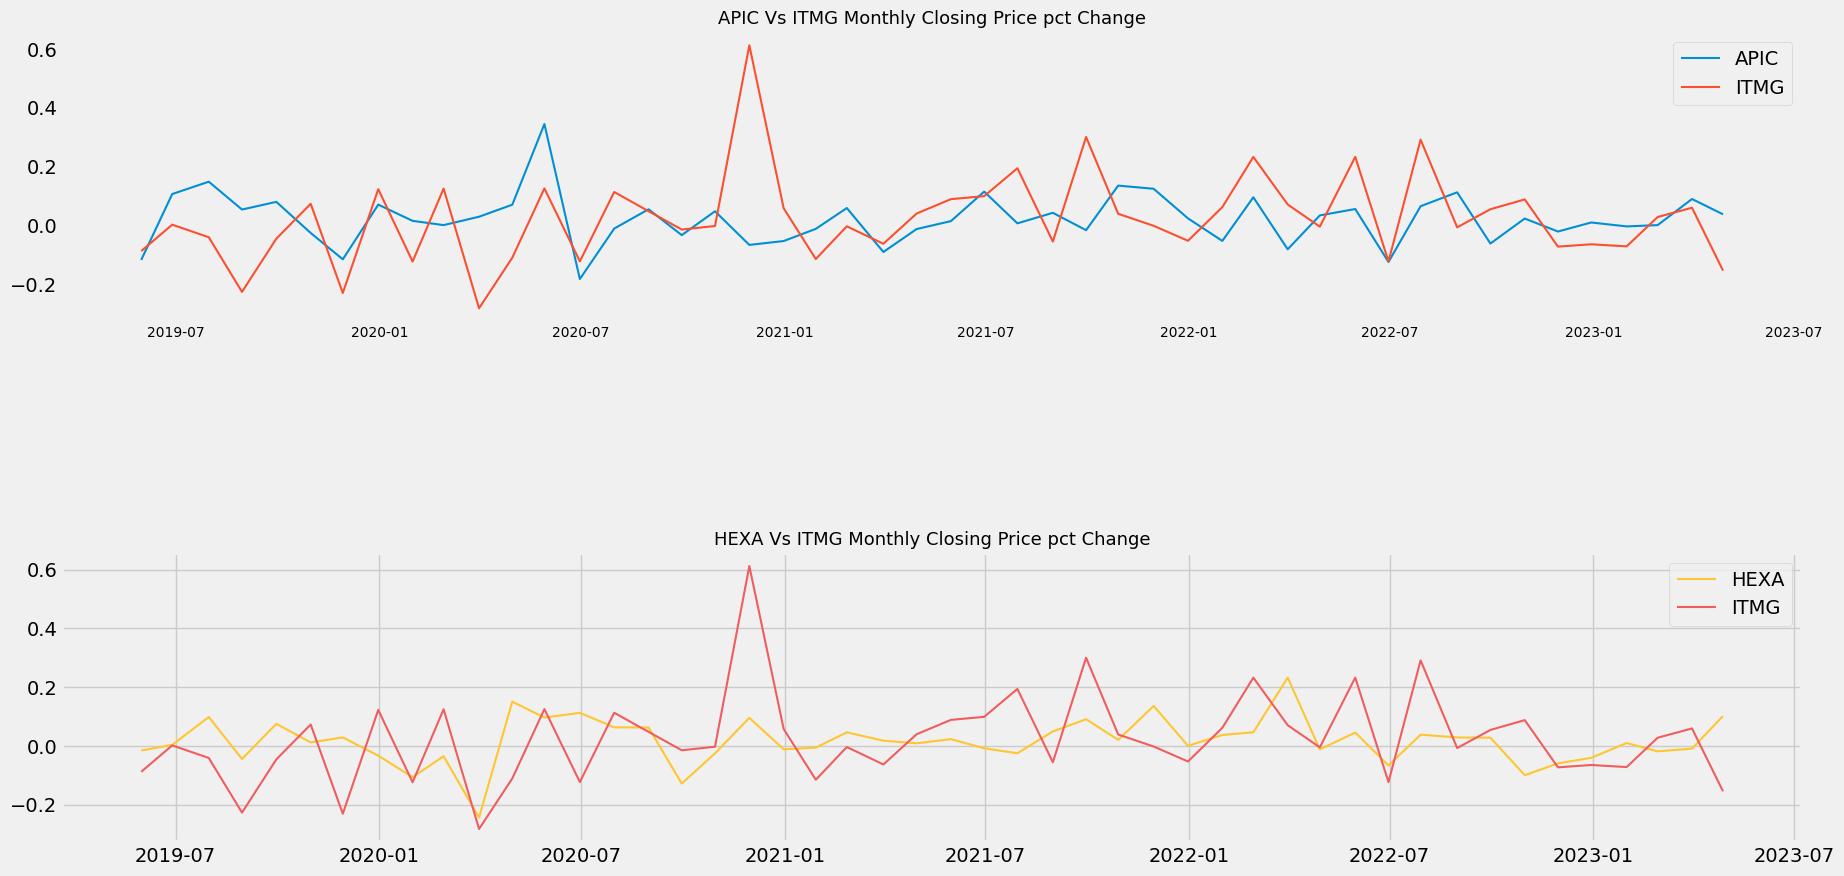

In [61]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(monthly_return.index, monthly_return.loc[:,["APIC.jk", 'ITMG.jk']], lw = 1.5)
plt.xticks(fontsize = 10)
plt.grid(False)
plt.title('APIC Vs ITMG Monthly Closing Price pct Change', fontsize = 13)
plt.legend([ 'APIC','ITMG'])

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.8)
plt.plot(monthly_return.index, monthly_return.loc[:,["HEXA.jk"]], lw = 1.5, color ='#fec630')
plt.plot(monthly_return.index, monthly_return.loc[:,["ITMG.jk"]], lw = 1.5, color ='#f05d5e')
plt.legend([ 'HEXA','ITMG'])
plt.title('HEXA Vs ITMG Monthly Closing Price pct Change', fontsize = 13)
plt.show()